<a href="https://colab.research.google.com/github/ojaypsalm/Age-Calculator/blob/main/Churn_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import joblib

In [5]:
df = pd.read_excel("/content/drive/MyDrive/Future intern/Telco_customer_churn.xlsx", engine='openpyxl')

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df['Churn Reason'].head(10)

,Churn Reason
0,Competitor made better offer
1,Moved
2,Moved
3,Moved
4,Competitor had better devices
5,Competitor offered higher download speeds
6,Competitor offered more data
7,Competitor made better offer
8,Competitor had better devices
9,Competitor had better devices


In [ ]:
df.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df['Churn Label'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn Label
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [ ]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [6]:
# show how many non-empty vs missing
print("Total rows:", len(df))
print(df['Churn Reason'].notna().sum(), "rows have churn_reason")
print(df['Churn Reason'].isna().sum(), "rows missing churn_reason")

# sample some values
display(df['Churn Reason'].dropna().sample(10, random_state=42))

# check missingness vs churn_label
print(pd.crosstab(df['Churn Reason'], df['Churn Reason'].isna(), margins=True))
# percent missing per churn_label
print(df.groupby('Churn Reason')['Churn Reason'].apply(lambda s: s.isna().mean()).reset_index(name='prop_missing'))


Total rows: 7043
1869 rows have churn_reason
5174 rows missing churn_reason


,Churn Reason
1700,Product dissatisfaction
1488,Attitude of service provider
921,Lack of self-service on Website
275,Competitor had better devices
416,Competitor made better offer
1654,Competitor offered more data
247,Competitor had better devices
383,Competitor offered more data
322,Don't know
203,Attitude of service provider


Churn Reason                               False   All
Churn Reason                                          
Attitude of service provider                 135   135
Attitude of support person                   192   192
Competitor had better devices                130   130
Competitor made better offer                 140   140
Competitor offered higher download speeds    189   189
Competitor offered more data                 162   162
Deceased                                       6     6
Don't know                                   154   154
Extra data charges                            57    57
Lack of affordable download/upload speed      44    44
Lack of self-service on Website               88    88
Limited range of services                     44    44
Long distance charges                         44    44
Moved                                         53    53
Network reliability                          103   103
Poor expertise of online support              19    19
Poor exper

In [7]:
#Features causing data Leakage
leakage_cols = ['Churn Reason', 'Churn Score', 'CLTV', 'Churn Label']

In [8]:
#Target Variable
y = df['Churn Label'].map({'Yes':1, 'No': 0})

In [9]:
#Remove Leakage columns from features
X = df.drop(columns=leakage_cols)

In [10]:
X['Total Charges'] = pd.to_numeric(X['Total Charges'], errors='coerce')



In [11]:
X['Total Charges'] = X['Total Charges'].fillna(X['Total Charges'].median())


In [12]:
#Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

In [13]:
#Identify categorical and Numerical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numeric_cols, cat_cols

(['Count',
  'Zip Code',
  'Latitude',
  'Longitude',
  'Tenure Months',
  'Monthly Charges',
  'Total Charges',
  'Churn Value'],
 ['CustomerID',
  'Country',
  'State',
  'City',
  'Lat Long',
  'Gender',
  'Senior Citizen',
  'Partner',
  'Dependents',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Online Security',
  'Online Backup',
  'Device Protection',
  'Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Contract',
  'Paperless Billing',
  'Payment Method'])

In [14]:
for col in X.columns:
  print(col, X[col].map(type).unique())

CustomerID [<class 'str'>]
Count [<class 'int'>]
Country [<class 'str'>]
State [<class 'str'>]
City [<class 'str'>]
Zip Code [<class 'int'>]
Lat Long [<class 'str'>]
Latitude [<class 'float'>]
Longitude [<class 'float'>]
Gender [<class 'str'>]
Senior Citizen [<class 'str'>]
Partner [<class 'str'>]
Dependents [<class 'str'>]
Tenure Months [<class 'int'>]
Phone Service [<class 'str'>]
Multiple Lines [<class 'str'>]
Internet Service [<class 'str'>]
Online Security [<class 'str'>]
Online Backup [<class 'str'>]
Device Protection [<class 'str'>]
Tech Support [<class 'str'>]
Streaming TV [<class 'str'>]
Streaming Movies [<class 'str'>]
Contract [<class 'str'>]
Paperless Billing [<class 'str'>]
Payment Method [<class 'str'>]
Monthly Charges [<class 'float'>]
Total Charges [<class 'float'>]
Churn Value [<class 'int'>]


In [15]:
#Build Preprocessing Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [31]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('xgb', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])


In [32]:
#Train  the model
xgb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Count', 'Zip Code',
                                                   'Latitude', 'Longitude',
                                                   'Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges',
                                                   'Churn Value']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CustomerID', 'Country',
                                                   'State', 'City', 'Lat Long',
                                                   'Gender', 'Senior Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone Service',
                                                   'M...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = xgb_pipeline.predict(X_test)
y_proba = xgb_pipeline.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0


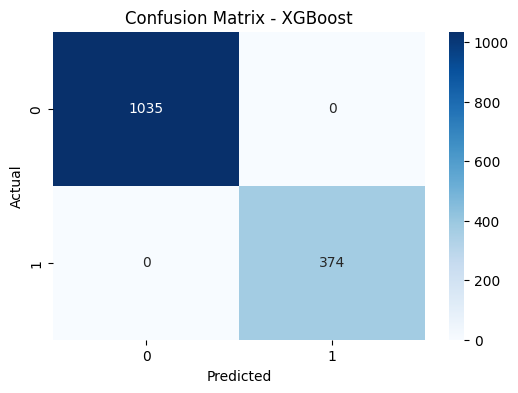

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

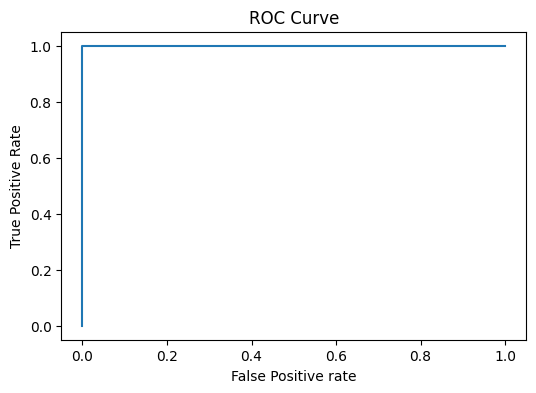

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [24]:
!pip install -q shap

In [36]:
# Extract trained XGBoost model
xgb = xgb_pipeline.named_steps['xgb']




In [39]:
import shap

In [52]:
X_test_transformed = xgb_pipeline.named_steps['preprocess'].transform(X_test)

print(type(X_test_transformed))
print(X_test_transformed.shape)


<class 'scipy.sparse._csr.csr_matrix'>
(1409, 8465)


In [53]:
if hasattr(X_test_transformed, "toarray"):
    X_test_transformed = X_test_transformed.toarray()


In [43]:
X_test_transformed.shape


(1409, 8465)

In [44]:
preprocessor = xgb_pipeline.named_steps['preprocess']

feature_names = preprocessor.get_feature_names_out()


In [45]:
import pandas as pd

X_test_df = pd.DataFrame(
    X_test_transformed,
    columns=feature_names,
    index=X_test.index
)


In [47]:
# Feature names
numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object','category','bool']).columns.tolist()

ohe = xgb_pipeline.named_steps['preprocess'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_cols)

feature_names = numeric_cols + list(cat_feature_names)

X_test_df = pd.DataFrame(
    X_test_transformed,
    columns=feature_names,
    index=X_test.index
)




In [55]:
X_train_transformed = xgb_pipeline.named_steps['preprocess'].transform(X_train)
X_test_transformed = xgb_pipeline.named_steps['preprocess'].transform(X_test)

# Convert sparse → dense if needed
if hasattr(X_train_transformed, "toarray"):
    X_train_transformed = X_train_transformed.toarray()
    X_test_transformed = X_test_transformed.toarray()


In [59]:
import shap

explainer = shap.Explainer(
    xgb_pipeline.named_steps['xgb'].predict_proba,
    X_train_transformed,
    max_evals = 1000
)


In [60]:
shap_values = explainer(X_test_transformed)
shap_vals = shap_values[..., 1]


PermutationExplainer explainer: 1410it [1:24:00,  3.58s/it]


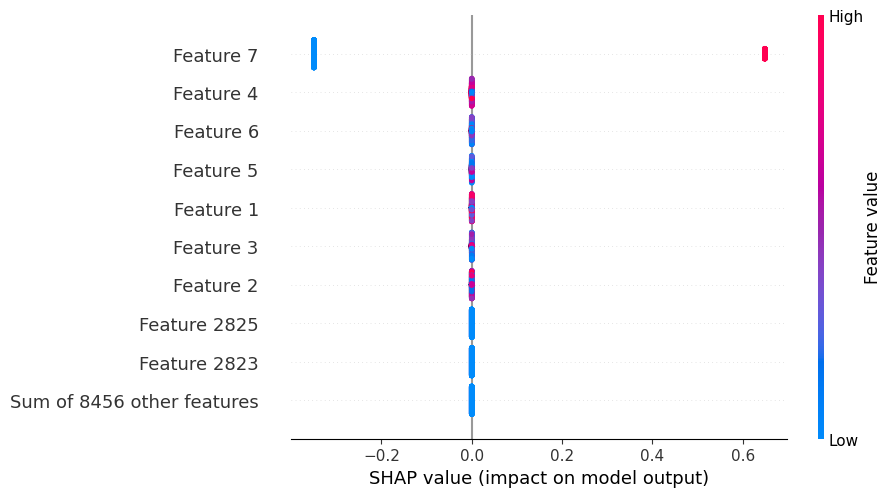

In [61]:
shap.plots.beeswarm(shap_vals)


/tmp/ipython-input-2103970783.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals.values, X_test_df, plot_type="bar")


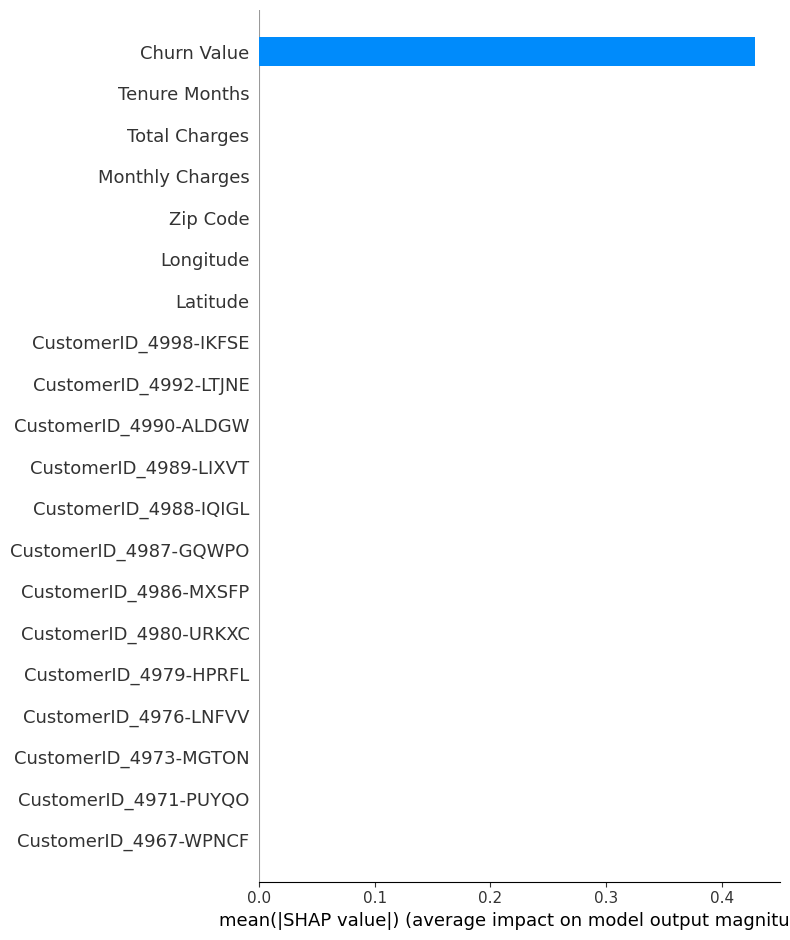

In [63]:
shap.summary_plot(shap_vals.values, X_test_df, plot_type="bar")


In [64]:
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/ojaypsalm/FUTURE_ML_02.git
git push -u origin main

SyntaxError: invalid syntax (ipython-input-722957962.py, line 1)